# **Author - Medha Badgire**

***Task -***

 ***To Predict the percentage of a student based on the no. of study hours by using simple linear regression***


##Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Importing the Data

In [3]:
df = pd.read_csv('http://bit.ly/w-data')

##Displaying the Data

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##Analyzing the data

In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##checking dtype of columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##Missing values

In [8]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

##visualization by plotiong data

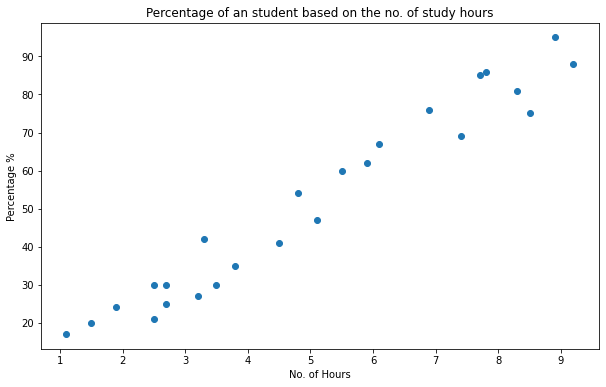

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))

# Ploting the data
scatter = ax.scatter(df["Hours"],
                     df["Scores"]);


ax.set(title = "Percentage of an student based on the no. of study hours",
       xlabel = "No. of Hours", 
       ylabel = "Percentage %");

We have to use two variables as attribute and label

attribute for input variable and label as a output variable

In [10]:
X = df.iloc[:, :-1]

In [13]:
y = df.iloc[:, -1]

In [12]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [14]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

##Train test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##Using linear regression

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [17]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

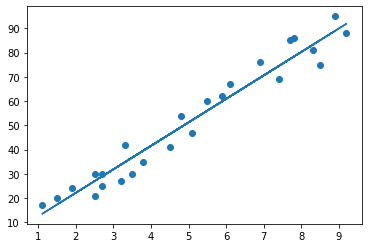

In [18]:
#Ploting the data
line = regressor.coef_ * X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show();

In [19]:
# Predicting the scores - In % using Testing data - In Hours
y_pred = regressor.predict(X_test)


In [20]:
# Calculate the models R^2 score
regressor.score(X_test, y_test)

0.9678055545167994

##Mean absolute error

In [21]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

3.9207511902099244

The average mean absolute error we achieved is 3.931

In [30]:
df_av_pd = pd.DataFrame(data = {
    "Actual Values": y_test,
    "Predictions": y_pred
})
df_av_pd

,Actual Values,Predictions
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


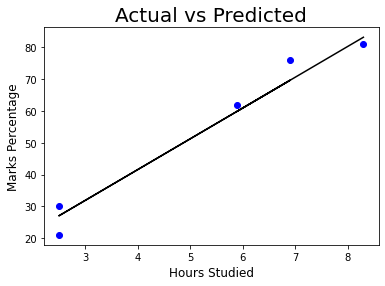

In [36]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

18.943211722315272

##Predicting the percentage of a student who studies for 9.25 hrs/day

In [38]:
hours = np.array([9.25])
prediction = regressor.predict(hours.reshape(-1, 1))
print(f'No of Hours = {hours[0]}')
print('Predicted Score = {:.2f} %'.format(prediction[0]))

No of Hours = 9.25
Predicted Score = 92.39 %


**So here we have got the result of The students who study 9.25 hrs/day can score 92.39 %**